# Auto Reload

In [1]:
%load_ext autoreload
%autoreload 2

# Lib

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Custom Libs
from utils import diff, check_stationality, yeo_johnson

plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')


# Statistics

In [15]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
df

,외국인_보유금액,외환보유액,FTSE,MSCI,외평채_2013,외평채_2014_04,외평채_2014_09,외평채_2015,외평채_2016,외평채_2019,...,국고채_3년,국고채_5년,국고채_10년,회사채_3년,CD,콜금리,기준금리,연준금리,AAII,VIX
Date,,,,,,,,,,,,,,,,,,,,,
200408월,165.6,1705.0,103.86,237.37,69.0,0.0,0.0,0.0,0.0,0.0,...,3.82,4.01,4.33,4.38,3.70,3.60,3.50,1.429,2.975,15.290
200409월,173.1,1745.0,107.45,245.87,75.0,0.0,97.0,0.0,0.0,0.0,...,3.59,3.75,4.14,4.10,3.52,3.52,3.50,1.605,15.940,13.340
200410월,171.3,1784.0,107.08,243.79,56.0,0.0,73.0,0.0,0.0,0.0,...,3.54,3.67,4.05,4.01,3.52,3.52,3.50,1.760,19.500,16.270
200411월,179.1,1926.0,111.54,252.75,62.0,0.0,85.0,0.0,0.0,0.0,...,3.42,3.53,3.96,3.86,3.42,3.34,3.25,1.932,34.900,13.240
200412월,179.7,1991.0,113.59,256.40,66.0,0.0,82.0,0.0,0.0,0.0,...,3.28,3.39,3.85,3.73,3.39,3.27,3.25,2.156,34.600,13.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202205월,695.3,4477.0,392.18,814.54,0.0,0.0,0.0,0.0,0.0,0.0,...,3.02,3.23,3.30,3.78,1.77,1.51,1.75,0.758,-27.175,26.190
202206월,593.0,4383.0,340.45,706.72,0.0,0.0,0.0,0.0,0.0,0.0,...,3.48,3.65,3.64,4.23,1.99,1.75,1.75,1.187,-26.960,28.709
202207월,629.9,4386.0,359.64,748.12,0.0,0.0,0.0,0.0,0.0,0.0,...,3.24,3.30,3.30,4.13,2.41,1.97,2.25,1.654,-19.500,21.330


In [16]:
out_lst, p_value_df = check_stationality(df=df)
p_value_df

정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.010,0.566,False
외환보유액,0.010,0.569,False
FTSE,0.010,0.297,False
MSCI,0.010,0.270,False
외평채_2013,0.010,0.171,False
외평채_2014_04,0.045,0.051,False
외평채_2014_09,0.010,0.137,False
외평채_2015,0.020,0.103,False
외평채_2016,0.010,0.525,False
외평채_2019,0.061,0.006,True


In [17]:
out_lst, _ = check_stationality(df=df)
df_diff3 = diff(df, out_lst, lag=3)
out_lst, p_value_df_diff3 = check_stationality(df_diff3)
p_value_df_diff3

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.002,True
외환보유액,0.100,0.005,True
FTSE,0.100,0.002,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.001,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.000,True
외평채_2016,0.100,0.001,True
외평채_2019,0.057,0.006,True


In [18]:
out_lst, _ = check_stationality(df=df)
df_diff6 = diff(df, out_lst, lag=6)
out_lst, p_value_df_diff6 = check_stationality(df_diff6)
p_value_df_diff6

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.003,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.003,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.002,True
외평채_2016,0.100,0.003,True
외평채_2019,0.051,0.007,True


In [19]:
out_lst, _ = check_stationality(df=df)
df_diff9 = diff(df, out_lst, lag=9)
out_lst, p_value_df_diff9 = check_stationality(df_diff9)
p_value_df_diff9

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.004,True
외환보유액,0.100,0.001,True
FTSE,0.100,0.005,True
MSCI,0.100,0.005,True
외평채_2013,0.100,0.003,True
외평채_2014_04,0.100,0.001,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.000,True
외평채_2016,0.100,0.006,True
외평채_2019,0.047,0.007,False


In [20]:
out_lst, _ = check_stationality(df=df)
df_diff12 = diff(df, out_lst, lag=12)
out_lst, p_value_df_diff12 = check_stationality(df_diff12)
p_value_df_diff12

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.001,True
MSCI,0.100,0.001,True
외평채_2013,0.100,0.019,True
외평채_2014_04,0.100,0.063,False
외평채_2014_09,0.100,0.002,True
외평채_2015,0.100,0.040,True
외평채_2016,0.100,0.071,False
외평채_2019,0.042,0.007,False


In [21]:
print(p_value_df_diff3['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff6['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff9['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff12['정상성_충족'].sum()/len(df.columns))

0.7777777777777778
0.8148148148148148
0.7777777777777778
0.5925925925925926


# Yeo-Johnson

In [22]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
out_lst, _ = check_stationality(df=df)
df_boxcox = yeo_johnson(df, out_lst)
out_lst, p_value_df_boxcox = check_stationality(df_boxcox)
p_value_df_boxcox

정상성을 체크합니다
Yeo-Johnson 변환을 실시합니다. 
변환 대상 : ['외국인_보유금액', '외환보유액', 'FTSE', 'MSCI', '외평채_2013', '외평채_2014_04', '외평채_2014_09', '외평채_2015', '외평채_2016', '외평채_2023', '외평채_2024', '외평채_2027', '외평채_2028', '외평채_2029', '외평채_2044', '외평채_2048', '국고채_3년', '국고채_5년', '국고채_10년', '회사채_3년', 'CD', '콜금리', '기준금리', '연준금리']
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.010,0.406,False
외환보유액,0.010,0.590,False
FTSE,0.010,0.197,False
MSCI,0.010,0.178,False
외평채_2013,0.010,0.756,False
외평채_2014_04,0.044,0.500,False
외평채_2014_09,0.010,0.648,False
외평채_2015,0.010,0.556,False
외평채_2016,0.010,0.643,False
외평채_2019,0.061,0.006,True


# Yeo-Jonhson After Diff

In [23]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
out_lst, _ = check_stationality(df=df)

diff_df = diff(df, out_lst, lag=6)
df_boxcox = yeo_johnson(diff_df, out_lst)
out_lst, p_value_df_boxcox = check_stationality(df_boxcox)
p_value_df_boxcox

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
Yeo-Johnson 변환을 실시합니다. 
변환 대상 : ['외국인_보유금액', '외환보유액', 'FTSE', 'MSCI', '외평채_2013', '외평채_2014_04', '외평채_2014_09', '외평채_2015', '외평채_2016', '외평채_2023', '외평채_2024', '외평채_2027', '외평채_2028', '외평채_2029', '외평채_2044', '외평채_2048', '국고채_3년', '국고채_5년', '국고채_10년', '회사채_3년', 'CD', '콜금리', '기준금리', '연준금리']
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.003,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.004,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.003,True
외평채_2016,0.100,0.003,True
외평채_2019,0.051,0.007,True


In [24]:
print(p_value_df_boxcox['정상성_충족'].sum())

19


# Trial #1 PCA

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')

X_train = df.iloc[:-1, 1:]
X_test = df.iloc[-1:, 1:]

y_train = df.iloc[:-1, 0]
y_test = df.iloc[:-1, 0]


## Scaling 
for col in X_train.columns :
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[[col]])
    X_test[col] = ss.transform(X_test[[col]])

ss = StandardScaler()
y_train = ss.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss.transform(y_test.values.reshape(-1, 1))

pca_obj1 = ['외환보유액','FTSE','MSCI']
pca_obj2 = ['외평채_2013','외평채_2014_04','외평채_2014_09','외평채_2015','외평채_2016','외평채_2019']
pca_obj3 = ['외평채_2023','외평채_2024','외평채_2027','외평채_2028','외평채_2029','외평채_2044','외평채_2048']
pca_obj4 = ['국고채_3년', '국고채_5년', '국고채_10년','회사채_3년']
pca_obj5 = ['CD', '콜금리', '기준금리']

obj_lst_n_1 = [pca_obj1, pca_obj4, pca_obj5]

pca_X_train = pd.DataFrame()
pca_X_test = pd.DataFrame()

## 축 1개로도 90% 넘게 설명 가능한 변수들 압축
for idx, objects in enumerate(obj_lst_n_1) :        
    pca = PCA(n_components=1)
    pcaed = pca.fit_transform(X_train[objects])
    pcaed_df = pd.DataFrame(pcaed, columns = [f'PCA_{idx}'])
    print(f'✅ PCA_{idx}의 설명력 {pca.explained_variance_ratio_}')
    pca_X_train = pd.concat([pca_X_train, pcaed_df], axis=1)
    
    pcaed_test = pca.transform(X_test[objects])
    pcaed_test_df = pd.DataFrame(pcaed_test, columns = [f'PCA_TEST_{idx}'])
    pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.columns = ['투자지수', '국고채관련', '금리관련']
pca_X_test.columns = ['투자지수', '국고채관련', '금리관련']

## 과거 외평채 압축
pca2 = PCA(n_components=2)
pcaed2 = pca2.fit_transform(X_train[pca_obj2])
pcaed2_df = pd.DataFrame(pcaed2, columns =['과거_외평채_1', '과거_외평채_2'])
pcaed_test = pca2.transform(X_test[pca_obj2])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['과거_외평채_1', '과거_외평채_2'])

pca_X_train = pd.concat([pca_X_train, pcaed2_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

print(f'✅ 과거 외평채 압축 변수의 설명력 {sum(pca2.explained_variance_ratio_)}')

## 미래 외평채 압축
pca3 = PCA(n_components=3)
pcaed3 = pca3.fit_transform(X_train[pca_obj3])
pcaed3_df = pd.DataFrame(pcaed3, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])
pcaed_test = pca3.transform(X_test[pca_obj3])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])

pca_X_train = pd.concat([pca_X_train, pcaed3_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.index = X_train.index
pca_X_test.index = X_test.index

print(f'✅ 미래 외평채 압축 변수의 설명력 {sum(pca3.explained_variance_ratio_)}')
pca_X_train


✅ PCA_0의 설명력 [0.96208784]
✅ PCA_1의 설명력 [0.9743059]
✅ PCA_2의 설명력 [0.99369425]
✅ 과거 외평채 압축 변수의 설명력 0.9384716900933983
✅ 미래 외평채 압축 변수의 설명력 0.9361729163673551


,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3
Date,,,,,,,,
200408월,-3.435317,1.124503,1.482001,-1.232471,0.478631,-1.465517,-0.584961,0.050061
200409월,-3.350257,0.789218,1.368613,-0.757681,0.780718,-1.465517,-0.584961,0.050061
200410월,-3.332528,0.681144,1.368613,-0.958405,0.635335,-1.465517,-0.584961,0.050061
200411월,-3.166645,0.506674,1.128540,-0.874679,0.693911,-1.465517,-0.584961,0.050061
200412월,-3.092265,0.323970,1.083727,-0.869469,0.701448,-1.465517,-0.584961,0.050061
...,...,...,...,...,...,...,...,...
202204월,2.701145,-0.149416,-1.369497,-1.560424,0.200355,3.322239,-1.358035,0.528113
202205월,2.704304,-0.011451,-1.102904,-1.560424,0.200355,3.689770,-1.471101,0.618481
202206월,1.875582,0.573747,-0.899278,-1.560424,0.200355,3.809221,-1.454587,0.643705


In [163]:
pca_X_test

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3
Date,,,,,,,,
202209월,1.31168,1.137162,0.237907,-1.560424,0.200355,4.040903,-1.360144,0.814802


In [164]:
'''
과거_외평채2와 미래외평채 3을 제외하고는 모두 정상성을 충족시키지 못함
차분과 Yeo-Johnson 변환 실시
'''
out_lst, p_vales_df = check_stationality(pca_X_train)

p_vales_df


정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.010,0.474,False
국고채관련,0.010,0.571,False
금리관련,0.010,0.332,False
과거_외평채_1,0.010,0.285,False
과거_외평채_2,0.071,0.030,True
미래_외평채_1,0.010,0.844,False
미래_외평채_2,0.044,0.485,False
미래_외평채_3,0.100,0.000,True


In [165]:
diff_df_pca = diff(pca_X_train, out_lst, lag=1)
out_lst, p_value_diff_pca_df = check_stationality(diff_df_pca)
p_value_diff_pca_df

차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.100,0.000,True
국고채관련,0.100,0.000,True
금리관련,0.100,0.000,True
과거_외평채_1,0.100,0.000,True
과거_외평채_2,0.073,0.029,True
미래_외평채_1,0.100,0.000,True
미래_외평채_2,0.100,0.000,True
미래_외평채_3,0.100,0.000,True


In [166]:
'''
Yeo-Johnson도 시도해봤는데 이건 정상성 효과가 없었음
=> 차분 (lag=1)으로 진행!!!!
'''
df_yj = yeo_johnson(pca_X_train, out_lst)
out_lst, p_value_yj_pca_df = check_stationality(df_yj)
p_value_yj_pca_df


Yeo-Johnson 변환을 실시합니다. 
변환 대상 : []
정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.010,0.474,False
국고채관련,0.010,0.571,False
금리관련,0.010,0.332,False
과거_외평채_1,0.010,0.285,False
과거_외평채_2,0.071,0.030,True
미래_외평채_1,0.010,0.844,False
미래_외평채_2,0.044,0.485,False
미래_외평채_3,0.100,0.000,True


# Fin EDA

<AxesSubplot:xlabel='Date'>

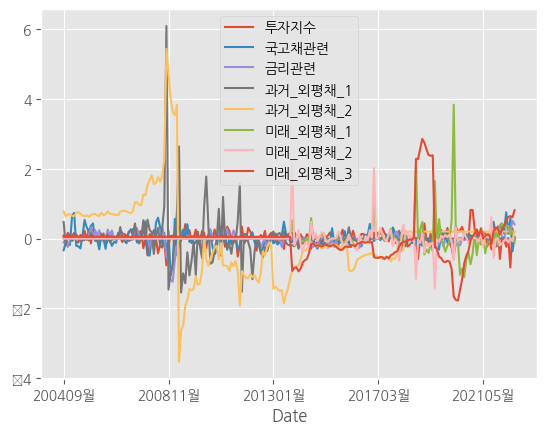

In [167]:
diff_df_pca.plot()

<AxesSubplot:>

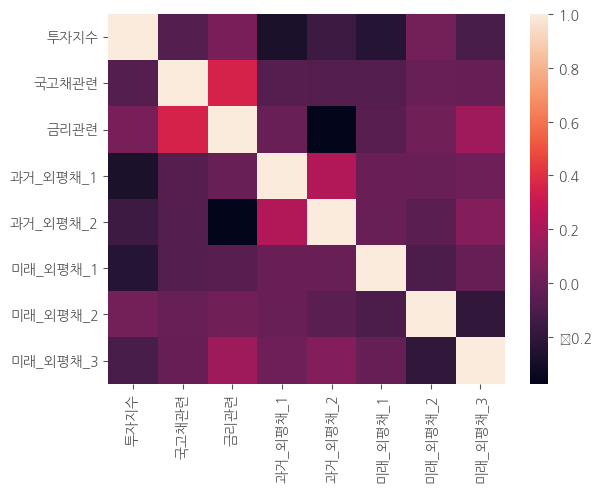

In [168]:
import seaborn as sns

sns.heatmap(diff_df_pca.corr())

# VAR Regreesor

In [169]:
new_y_train = y_train[1:]

diff_df_pca['Target'] = new_y_train
diff_df_pca

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,Target
Date,,,,,,,,,
200409월,0.085060,-0.335285,-0.113388,4.747899e-01,0.780718,-5.773160e-15,1.554312e-15,0.050061,-1.562730
200410월,0.017729,-0.108074,0.000000,-2.007237e-01,0.635335,5.329071e-15,-3.330669e-16,0.050061,-1.573764
200411월,0.165883,-0.174470,-0.240073,8.372658e-02,0.693911,2.886580e-15,-6.661338e-16,0.050061,-1.525950
200412월,0.074380,-0.182705,-0.044813,5.209531e-03,0.701448,-1.554312e-15,3.330669e-16,0.050061,-1.522272
200501월,0.080362,0.641967,0.029561,-6.977215e-02,0.652635,0.000000e+00,0.000000e+00,0.050061,-1.456680
...,...,...,...,...,...,...,...,...,...
202204월,-0.231913,0.752291,0.202262,0.000000e+00,0.200355,3.504138e-01,6.238896e-03,0.528113,1.640821
202205월,0.003160,0.137965,0.266593,0.000000e+00,0.200355,3.675306e-01,-1.130658e-01,0.618481,1.638369
202206월,-0.828723,0.585199,0.203626,0.000000e+00,0.200355,1.194515e-01,1.651437e-02,0.643705,1.011268


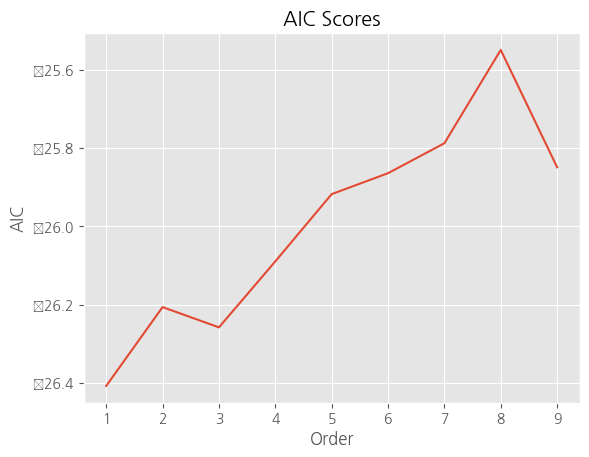

최소 AIC 값 : p = -26.40725993988118
최적의 p 값 : 1


1

In [170]:
from VAR_reg import VARModel


VARMODEL = VARModel(df = diff_df_pca)
min_p = VARMODEL.find_p()
min_p
## p=1 일때 제일 적합

In [171]:
fitted_model = VARMODEL.train(p = min_p)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Nov, 2022
Time:                     14:23:53
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -24.9963
Nobs:                     215.000    HQIC:                  -25.8372
Log likelihood:           183.134    FPE:                3.40201e-12
AIC:                     -26.4073    Det(Omega_mle):     2.25964e-12
--------------------------------------------------------------------
Results for equation 투자지수
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.025912         0.015039            1.723           0.085
L1.투자지수             0.011057         0.074566            0.148           0.882
L1.국고채관련            0.002743         0.067184            0.041       

In [172]:
VARMODEL.forecast(fitted_model=fitted_model,train_df = pca_X_train, test_df = pca_X_test, min_p=min_p)

KeyError: -1

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3
Date,,,,,,,,
202209월,1.31168,1.137162,0.237907,-1.560424,0.200355,4.040903,-1.360144,0.814802
